# PyTorch Computer Vision

* See reference notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb
* See reference online book - https://www.learnpytorch.io/03_pytorch_computer_vision/


## 0. Computer vision libraries in PyTorch

* [`torchvision`] - base domain library for computer vision in PyTorch
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.modelss` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset



In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu124
0.20.1+cu124


## 1. Getting a adataset

The dataset we'll be using is FashionMNIST from torchvision.datasets - https://pytorch.org/vision/0.20/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True, # do we want the training dataset or testing dataset
    download=True,
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None, # how do we want to transform the targets?
)

test_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=False, # do we want the training dataset or testing dataset
    download=True,
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None,
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.8MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 271kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.96MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 9.75MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check the shape if our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image Label: {label} -> {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image Label: 9 -> Ankle boot


### 1.1 Visualizing the data

Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

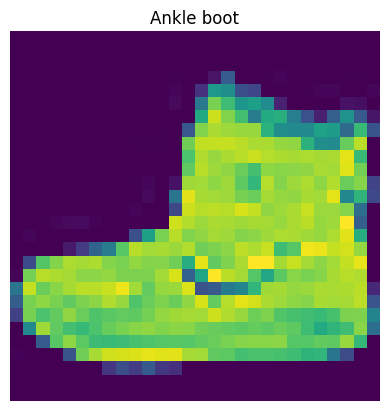

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis(False)

(-0.5, 27.5, 27.5, -0.5)

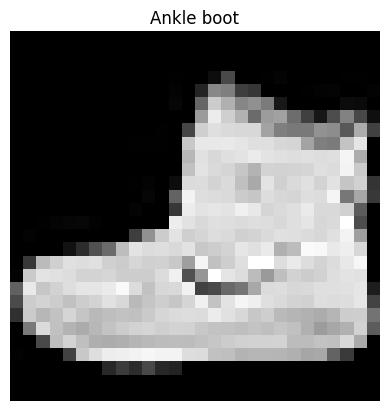

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

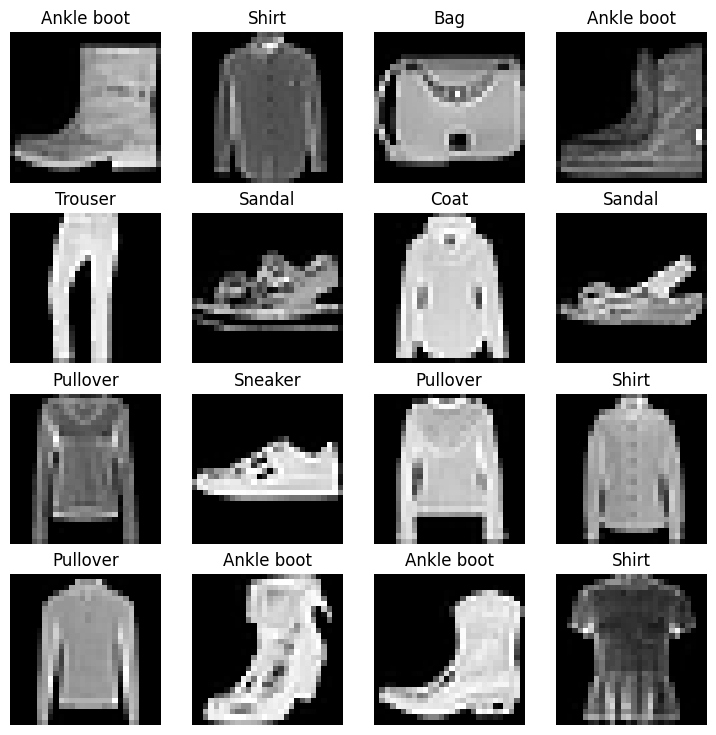

In [11]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets

DataLoader turns our dataset into a python iterable.

More specifically, we want to turn our data into batches or mini-batches.

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32)
2. It gives our neural network more chances to update its gradients per epoch.


In [12]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)
test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78d5d0a655d0>,
 <torch.utils.data.dataloader.DataLoader at 0x78d5d0a61090>)

In [13]:
# Lets check out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x78d5d0a655d0>, <torch.utils.data.dataloader.DataLoader object at 0x78d5d0a61090>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [14]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image shape: torch.Size([1, 28, 28])
Label: Shirt


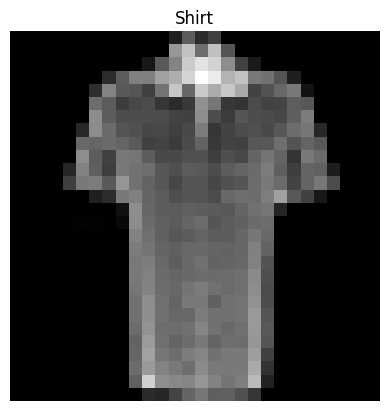

In [15]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(low=0, high=len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image shape: {img.shape}")
print(f"Label: {class_names[label]}")

## 3. Model0: Build a baseline model

When starting to build a series of ML experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments

In other words: start simply and add complexity when necessary.

In [16]:
# Creating a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [17]:
# Flatten the sample
output = flatten_model(x)
output.shape

torch.Size([1, 784])

In [18]:
print(f"Shae before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shae before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [19]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)


In [20]:
torch.manual_seed(42)

# Setup model with inut parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1,1,28,28])

dummy_x.shape, model_0(dummy_x).shape

(torch.Size([1, 1, 28, 28]), torch.Size([1, 10]))

### 3.1 Setup loss and optimizer and evaluation metrics

* Loss Function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()`
* Evaluation metric - Accuracy

In [22]:
# Accuracy Function

def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [23]:
# Setup Loss Function and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time.

  Args:
    start (float): Start time of computation (preferred in timeit format).
    end (float): End time of computation.
    device ([type], optional): Device that compute is running
  Returns:
    float: time between start and end in seconds (higher is longer).
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [25]:
start_time = timer()
# some code...
end_time = timer()
train_time = print_train_time(start=start_time,
                 end=end_time,
                 device="cpu")

Train time on cpu: 0.000 seconds


### 3.3 Creating a training loop and training on batches of data

1. Loop through epochs.
2. Loop throuugh training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test *per batch*.
4. Print out what's happening
5. Time it all

In [26]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ### Training
  train_loss = 0
  # Add a loop to loop through training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # Forward pass
    y_pred = model_0(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss+= loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss Backward
    loss.backward()

    # Optimizer Step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_pred=test_pred.argmax(dim=1),
                              y_true=y_test)

    # Calculate test loss average per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04
Epoch: 1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20
Epoch: 2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43
Train time on cpu: 36.707 seconds


## 4. Make Prediction and get Model 0 results

In [27]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """
  Returns a dictionary containing the results of model predicting on data_loader.
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Average Loss and Acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {
      "model_name": model.__class__.__name__,
      "model_loss": loss.item(),
      "model_acc": acc
  }

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Building Model Agnostic Code (GPU Credits over. Revisit next month)

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in the previous notebook.

In [29]:
### 6.1 Build a model with linear and non-linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)

torch.manual_seed(42)

model_1 = FashionMNISTModelV1(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

In [30]:
next(model_1.parameters()).device

device(type='cpu')

### 6.1 Setup loss, optimizer and evaluation metrics

In [31]:
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1) # tries to update our model's parameters to reduce the loss

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [32]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.dataloader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               accuracy_fn: accuracy_fn,
               device: torch.device = device):
  """
  Performs training with model trying to learn on data_loader
  """
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()
  # Add a loop through the training batches
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    acc = accuracy_fn(y_true=y,
                     y_pred=y_pred.argmax(dim=1))
    train_acc += acc

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Calculate train loss and accuracy per epoch
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%\n")

In [33]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.dataloader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """
  Performs a testing loop step on model going over data loader
  """
  test_loss, test_acc = 0, 0

  # Put model in eval mode
  model.eval()
  with torch.inference_mode():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate the loss
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                        y_pred=test_pred.argmax(dim=1))

  # Calculate test loss and accuracy per epoch
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
  print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [34]:
start_time = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn)
  test_step(model_1, test_dataloader, loss_fn, accuracy_fn)
end_time = timer()
total_train_time_model_1 = print_train_time(start=start_time,
                                            end=end_time,
                                            device=str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.67940 | Train acc: 75.31%

Test loss: 0.54423 | Test acc: 80.87%

Train loss: 0.49702 | Train acc: 82.32%

Test loss: 0.47315 | Test acc: 83.13%

Train loss: 0.46315 | Train acc: 83.42%

Test loss: 0.48061 | Test acc: 82.60%

Train time on cpu: 33.053 seconds


In [35]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.48060768842697144,
 'model_acc': 82.59784345047923}

In [36]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

**NOTE**: Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU
2. The hardware you're using has a better CPU in terms of compute capability than the GPU

For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

## 7. Model 2: Building a Concolutional Neural Network (CNN)

CNN's are also known as ConvNets

CNN's are also known for their capabilities to find patterns in visual data

To find out what's happening inside a CNN, see this *website* https://poloclub.github.io/cnn-explainer/

In [51]:
# Create a convolutional Neural Network
class FashionMNISTModelV2(nn.Module):
  """
  Model Architecture that replicates the TinyVGG
  model from the CNN explainer website.
  """
  def __init__(
      self,
      input_shape: int,
      hidden_units: int,
      output_shape: int,
      ):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create a Conv Layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # hyperparameters of our Conv2D layer
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    # print(f"Output Shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output Shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier_layer: {x.shape}")
    return x

In [52]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

### 7.1 Stepping through nn.Conv2d()

See the documentation for `nn.Conv2d()` here https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [53]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test Image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test Image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [54]:
# Create a single Conv2d Layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([64, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

See the documentation for `nn.MaxPool2d()` here https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [55]:
# Print out original image shape
print(f"Test image original shape: {test_image.shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv layer
test_image_through_conv = conv_layer(test_image)
print(f"Test image shape after conv: {test_image_through_conv.shape}")

# Pass data through MaxPool2d layer
test_image_through_pool = max_pool_layer(test_image_through_conv)
print(f"Test image shape after pool: {test_image_through_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image shape after conv: torch.Size([64, 64, 64])
Test image shape after pool: torch.Size([64, 32, 32])


In [56]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))

# Create a max pool layer
print(f"Random tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max Pool Tensor shape: {max_pool_tensor.shape}")

Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max Pool Tensor shape: torch.Size([1, 1, 1, 1])


In [57]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [58]:
rand_image_tensor = torch.randn(size=(1, 1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 1, 28, 28])

In [59]:
rand_image_passthrough_model_tensor = model_2(rand_image_tensor)
rand_image_passthrough_model_tensor.shape
rand_image_passthrough_model_tensor

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

### 7.3 Setup a loss function and optimizer for `model_2`

In [60]:
# Setup loss function/eval. metrcis/optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [62]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and Test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model=model_2,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(model=model_2,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)
  print("\n")

# Measure time
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=str(next(model_2.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.36475 | Train acc: 86.92%

Test loss: 0.35552 | Test acc: 87.03%



Epoch: 1
---------
Train loss: 0.32651 | Train acc: 88.19%

Test loss: 0.33109 | Test acc: 87.47%



Epoch: 2
---------
Train loss: 0.30717 | Train acc: 88.88%

Test loss: 0.31826 | Test acc: 88.52%



Train time on cpu: 176.119 seconds


In [63]:
# Get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3182623088359833,
 'model_acc': 88.51837060702876}

In [64]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [65]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.48060768842697144,
 'model_acc': 82.59784345047923}

## 8. Compare model results and training time

In [67]:
import pandas as pd
compare_results = pd.DataFrame(data=[model_0_results,
                                    model_1_results,
                                    model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.480608,82.597843
2,FashionMNISTModelV2,0.318262,88.518371


In [68]:
# Add training time to results comparison
compare_results["training_time"] = [f"{total_train_time_model_0}",
                                    f"{total_train_time_model_1}",
                                    f"{total_train_time_model_2}"]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,36.706670633000016
1,FashionMNISTModelV1,0.480608,82.597843,33.052561267000016
2,FashionMNISTModelV2,0.318262,88.518371,176.1193432319999


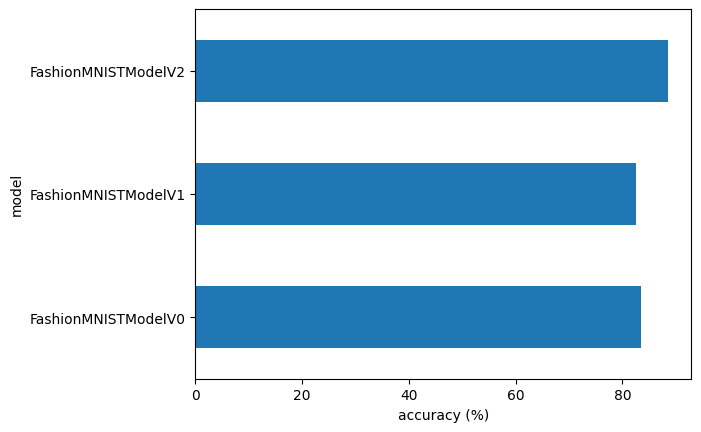

In [71]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")
plt.show()

## 9. Make and evaluate random predictions with best model

In [73]:
def make_predictions(
    model: torch.nn.Module,
    data: list,
    device: torch.device = device,
):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = sample.to(device)
      sample = sample.unsqueeze(dim=0)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [109]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

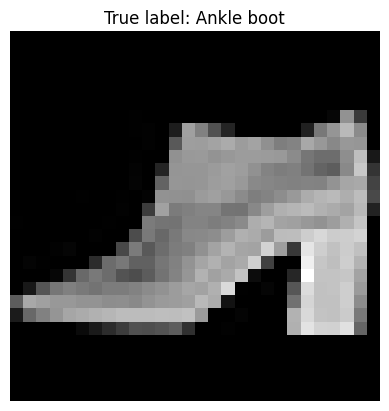

In [110]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(f"True label: {class_names[test_labels[0]]}")
plt.axis(False)
plt.show()

In [111]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View the first two prediction probabilities
pred_probs[:2]

tensor([[6.7269e-07, 1.9376e-07, 5.5890e-07, 5.9191e-07, 4.4787e-07, 1.7113e-03,
         1.6191e-06, 1.7924e-04, 1.8260e-04, 9.9792e-01],
        [8.7487e-06, 1.0405e-05, 8.6871e-04, 6.1944e-07, 9.8452e-01, 1.4181e-07,
         1.4356e-02, 1.9947e-07, 2.3259e-04, 1.7853e-06]])

In [112]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 4, 6, 9, 7, 0, 4, 0, 5])

In [113]:
test_labels

[9, 4, 2, 9, 7, 6, 4, 0, 5]

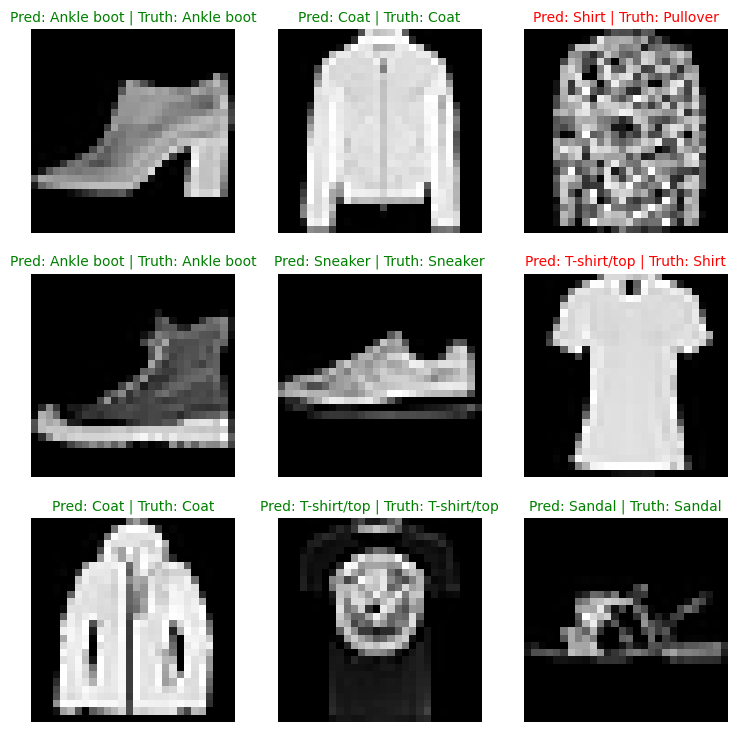

In [114]:
# Plot Predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False)
plt.show()

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually

1. Make predictions with our trained model
2. Make a confusion matrix
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()` - https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [122]:
# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # Do the forward pass
    y_logit = model_2(X)

    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_preds = torch.cat(y_preds)
y_preds.shape

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

torch.Size([10000])

In [123]:
y_preds[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [126]:
y

tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5])

In [124]:
!pip install torcheval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 3.3 MB/s eta 0:00:00


In [127]:
from torcheval.metrics import MulticlassConfusionMatrix

conf_mat = MulticlassConfusionMatrix(num_classes=len(class_names))
conf_mat.update(y_preds, test_data.targets)
confmat_tensor = conf_mat.compute()
confmat_tensor

tensor([[601.,   6.,  41.,  88.,  11.,   1., 247.,   0.,   5.,   0.],
        [  8., 916.,   5.,  50.,  12.,   0.,   7.,   0.,   2.,   0.],
        [  7.,   2., 793.,  11., 107.,   0.,  75.,   0.,   5.,   0.],
        [ 24.,  12.,  19., 859.,  43.,   0.,  36.,   0.,   5.,   2.],
        [  5.,   7., 106.,  42., 740.,   0.,  96.,   0.,   4.,   0.],
        [  7.,   2.,   6.,  10.,   1., 829.,   6.,  50.,  67.,  22.],
        [ 70.,   7., 110.,  66.,  98.,   0., 642.,   0.,   7.,   0.],
        [  1.,   1.,   0.,   0.,   0.,  30.,   0., 894.,  13.,  61.],
        [  9.,   4.,  18.,  15.,  14.,   9.,  48.,   7., 874.,   2.],
        [  1.,   1.,   1.,   1.,   0.,  17.,   3.,  77.,  10., 889.]])

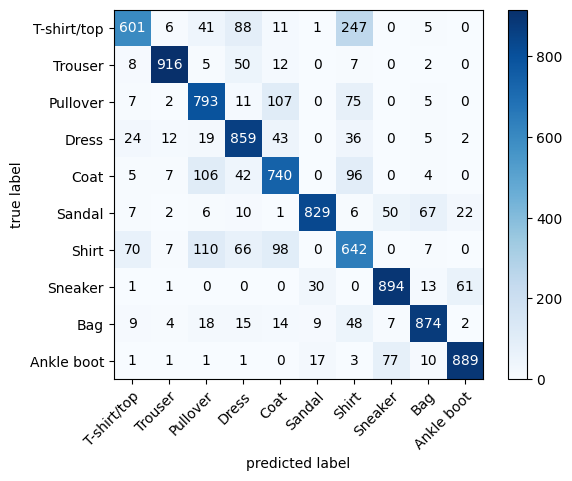

In [132]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                colorbar=True,
                                show_absolute=True,
                                class_names=class_names)
plt.show()

## 11. Save and load best performing model

In [135]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state doct
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [139]:
# Create a new instance of the model
torch.manual_seed(42)
model_loaded = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

 # Load in the saved state_dict()
model_loaded.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
model_loaded.to(device)

<ipython-input-139-9dd208df544f>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_loaded.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [142]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3182623088359833,
 'model_acc': 88.51837060702876}

In [143]:
loaded_model_results = eval_model(model=model_loaded,
                                  data_loader=test_dataloader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn)
loaded_model_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3182623088359833,
 'model_acc': 88.51837060702876}

In [146]:
# check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_results["model_loss"]),
              atol=1e-02)

tensor(True)